In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Import data 
df = pd.read_csv('commit_data.csv', index_col=0)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove the time component from the 'Date' column
df['Date'] = df['Date'].dt.floor('D')

# Remove commits made by bot
df = df.loc[df['Author Name'] != 'dependabot[bot]']

# Remove commits that didn't change any lines
df = df.loc[df['Lines Changed'] != 0]

In [3]:
# Calculate the total number of commits
total_commits = df.shape[0]

# Calculate the total number of unique authors
total_authors = df['Author Name'].nunique()

# Get the date of the first commit and format it as "dd/mm/yyyy"
first_commit_date = df['Date'].min().strftime("%d/%m/%Y")

# Get the date of the last commit and format it as "dd/mm/yyyy"
last_commit_date = df['Date'].max().strftime("%d/%m/%Y")

# Calculate the total number of files changed
total_files_changed = df['Files Changed'].sum()

# Calculate the total number of lines changed
total_lines_changed = df['Lines Changed'].sum()

In [5]:
# Calculate the mean number of commits per day
mean_commits_per_day = total_commits / (df['Date'].max() - df['Date'].min()).days

# Calculate the maximum number of commits per day
max_commits_per_day = df.groupby('Date').size().max()

# Calculate the minimum number of commits per day
min_commits_per_day = df.groupby('Date').size().min()

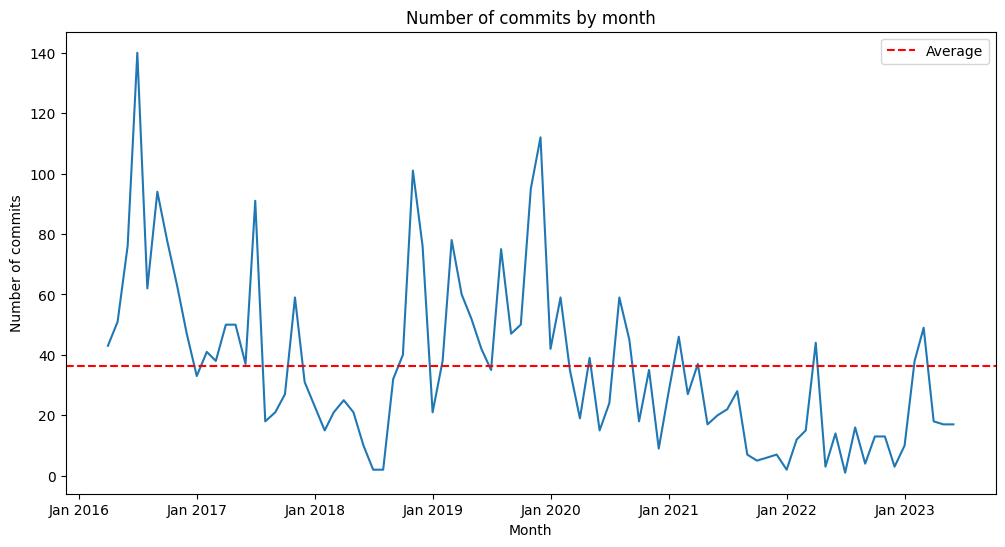

In [6]:
# Set the "Date" column as the index
df_monthly = df.set_index('Date')

# Resample the data by month and count the number of commits
df_monthly = df_monthly.resample('M').size().reset_index(name='Commit Count')

# Calculate the average commit count per month
average_commit = df_monthly['Commit Count'].mean()

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the line plot
sns.lineplot(x='Date', y='Commit Count', data=df_monthly)

# Plot the average line
plt.axhline(average_commit, color='red', linestyle='--', label='Average')

# Set the title and labels
plt.title('Number of commits by month')
plt.xlabel('Month')
plt.ylabel('Number of commits')

# Set the x-axis tick format to show month and year
date_format = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Show the plot
plt.legend()
plt.show()


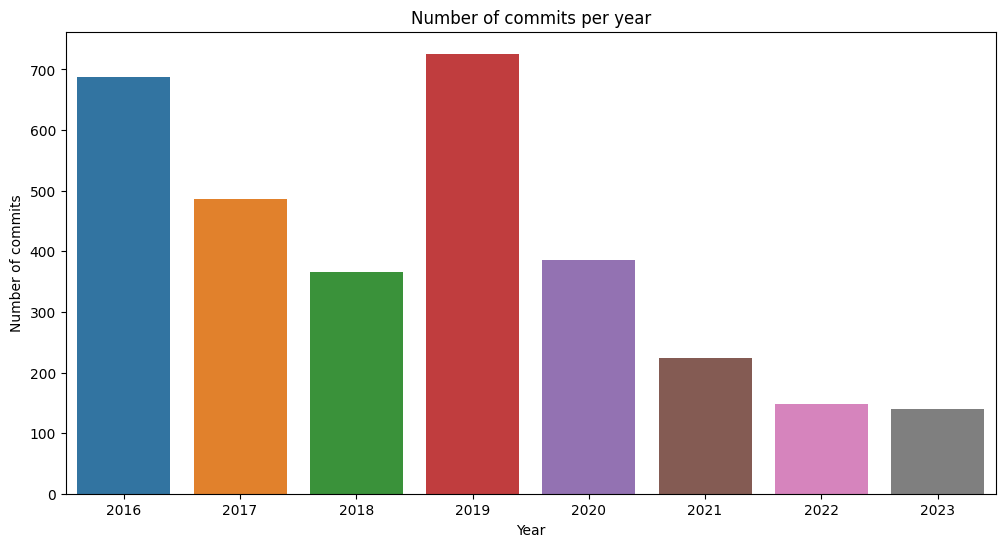

In [7]:
# Create a column "Year" to store information about the year
df['Year'] = df['Date'].dt.year

# Create a new DataFrame with commit counts per year
df_yearly = df.groupby('Year').size().reset_index(name='Commit Count')

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot a bar chart
sns.barplot(x='Year', y='Commit Count', data=df_yearly)

# Set the title and axis labels
plt.title('Number of commits per year')
plt.xlabel('Year')
plt.ylabel('Number of commits')

# Show the plot
plt.show()

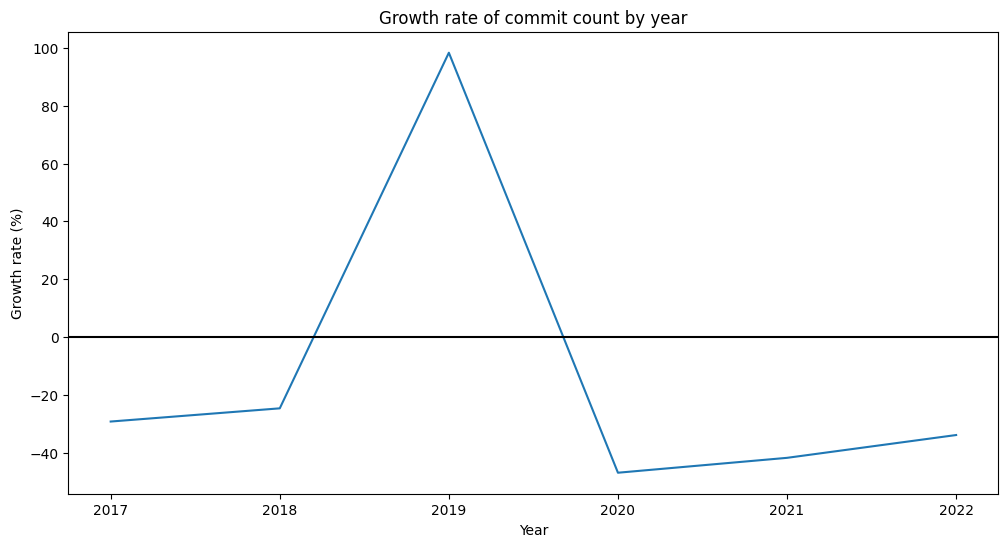

In [8]:
# Create a new DataFrame with the number of commits per year
df_yearly = df.groupby('Year').size().reset_index(name='Commit Count')

# Exclude the year 2023
df_yearly = df_yearly[df_yearly['Year'] != 2023]

# Calculate the growth rate as a percentage
df_yearly['Growth Rate'] = df_yearly['Commit Count'].pct_change() * 100

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the line chart using seaborn
sns.lineplot(x='Year', y='Growth Rate', data=df_yearly)

# Plot the horizontal line at 0.0
plt.axhline(y=0, color='black', linestyle='-')

# Set the title and axis labels
plt.title('Growth rate of commit count by year')
plt.xlabel('Year')
plt.ylabel('Growth rate (%)')

# Display the plot
plt.show()

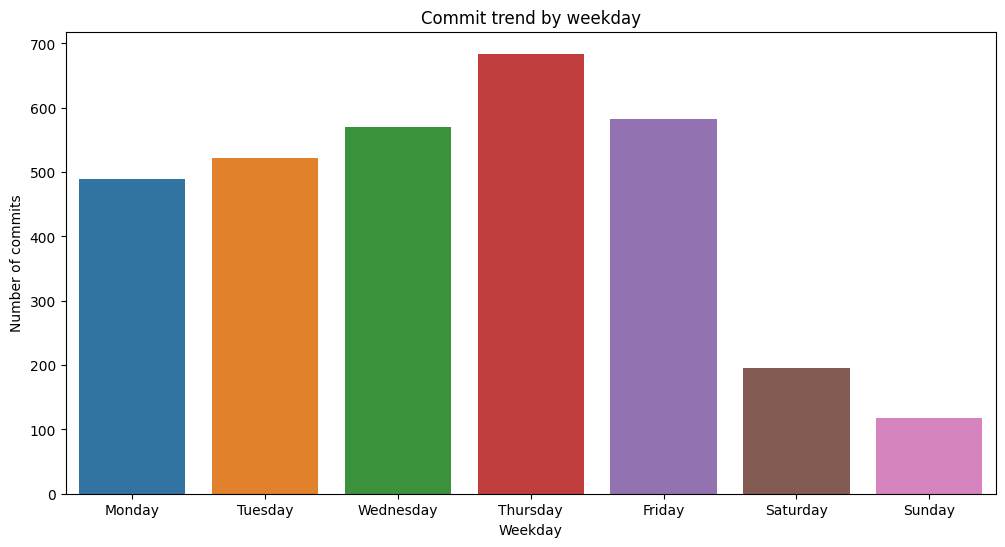

In [9]:
# Create a new DataFrame with the number of commits per weekday
df_weekday = df.groupby(df['Date'].dt.weekday).size().reset_index(name='Commit Count')
df_weekday['Weekday'] = df_weekday['Date'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot a bar chart
sns.barplot(x='Weekday', y='Commit Count', data=df_weekday)

# Set the title and axis labels
plt.title('Commit trend by weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of commits')

# Display the chart
plt.show()

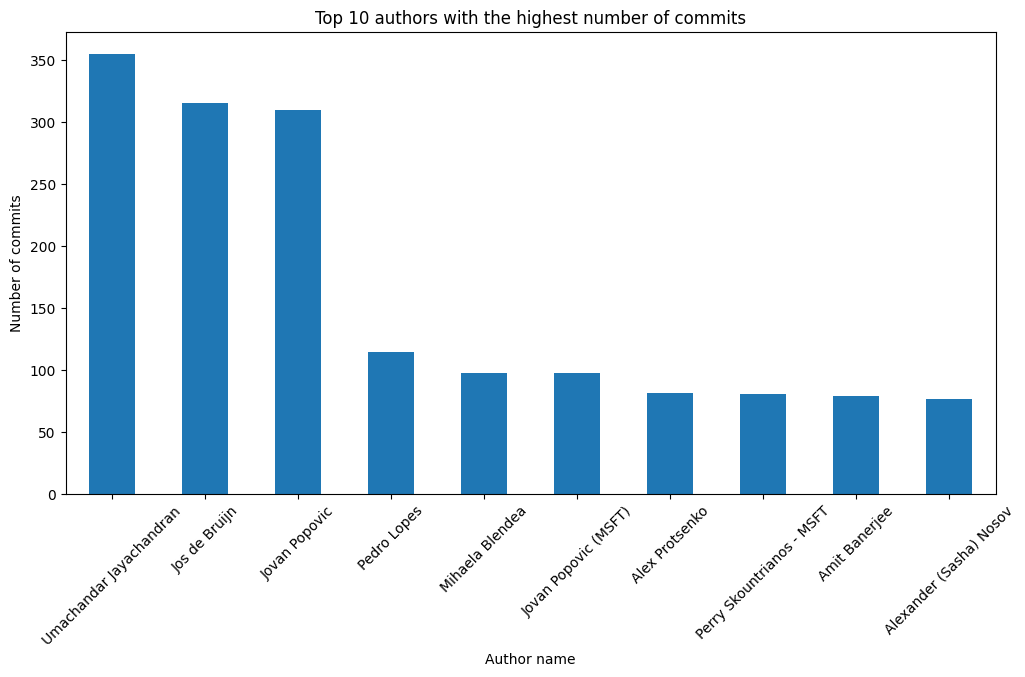

Author Name
Umachandar Jayachandran      355
Jos de Bruijn                316
Jovan Popovic                310
Pedro Lopes                  115
Mihaela Blendea               98
Jovan Popovic (MSFT)          98
Alex Protsenko                82
Perry Skountrianos - MSFT     81
Amit Banerjee                 79
Alexander (Sasha) Nosov       77
Name: count, dtype: int64

In [28]:
author_commit_counts = df['Author Name'].value_counts()

# Calculate the mean number of commits per author
mean_commits_per_author = total_commits / author_commit_counts.shape[0]

# Get the top 10 authors with the highest number of commits
top_10_authors = author_commit_counts.head(10)

# Create a bar plot for the top 10 authors
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Author name')
plt.ylabel('Number of commits')
plt.title('Top 10 authors with the highest number of commits')
plt.xticks(rotation=45)
plt.show()

author_commit_counts.head(10) 

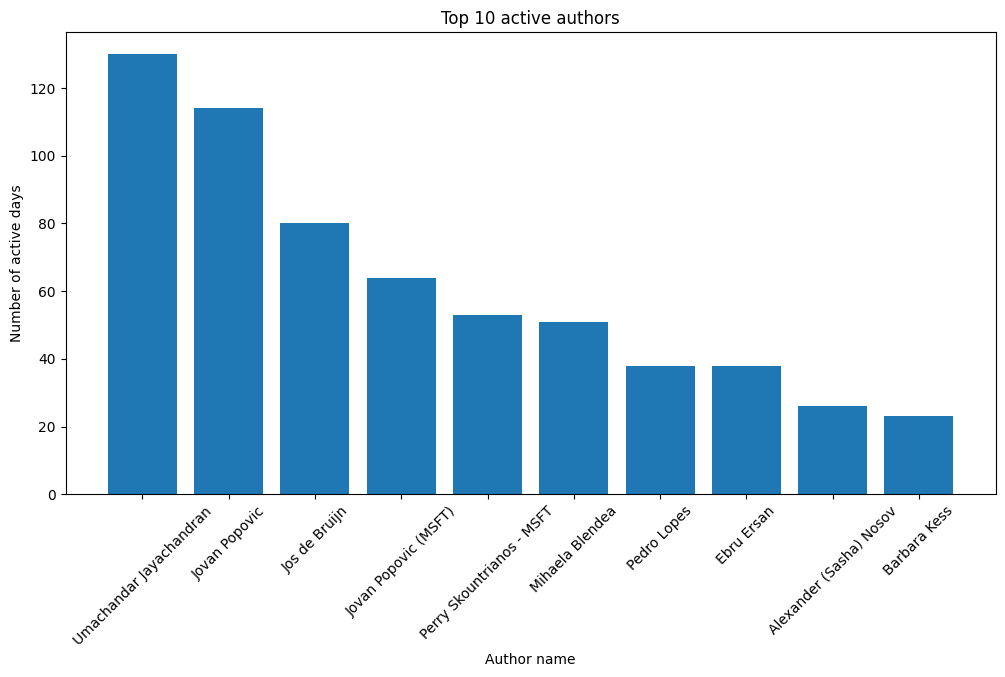

Author Name
Umachandar Jayachandran      130
Jovan Popovic                114
Jos de Bruijn                 80
Jovan Popovic (MSFT)          64
Perry Skountrianos - MSFT     53
Mihaela Blendea               51
Pedro Lopes                   38
Ebru Ersan                    38
Alexander (Sasha) Nosov       26
Barbara Kess                  23
Name: Date, dtype: int64

In [26]:
# Calculate the total number of days each author has made commits
days_active_per_author = df.groupby('Author Name')['Date'].nunique()

# Sort the values in descending order to get the top active authors
top_active_authors = days_active_per_author.sort_values(ascending=False).head(10)

# Create a bar plot for top 10 active authors
plt.figure(figsize=(12, 6))
plt.bar(top_active_authors.index, top_active_authors.values)
plt.xlabel('Author name')
plt.ylabel('Number of active days')
plt.title('Top 10 active authors')
plt.xticks(rotation=45)
plt.show()

top_active_authors


In [47]:
file_changed_counts = df['Files Changed'].value_counts()

# Calculate the mean number of files changed per commit
mean_file_changed_counts_per_commit = total_files_changed / total_commits

# Calculate the mean number of lines changed per file
mean_line_changed_counts_per_file = total_lines_changed / total_files_changed

# Calculate the maximum number of files changed in a commit
max_files_changed = df['Files Changed'].max()

# Calculate the maximum number of lines changed in a commit
max_lines_changed = df['Lines Changed'].max()

# Get the value (number of files changed) of the most popular files changed
most_popular_files_changed = file_changed_counts.index[0]

# Get the count of the most popular files changed
num_most_popular_files_changed = file_changed_counts[most_popular_files_changed]

# Calculate the ratio of commits with the most frequent number of files changed
ratio_most_popular = num_most_popular_files_changed / total_commits * 100

ratio_most_popular

60.26573869028788

In [48]:
# Add 'Action' column
def get_action(message):
    # Split the message into individual words
    words = message.split()

    # Extract the first word as the action
    action = words[0]

    # Map synonymous actions to their standard representation
    if action in ['Update', 'Updating', 'Updated', 'Updates', 'update', 'updates', 'updating', 'updated']:
        action = 'Update'
    elif action in ['Fix', 'Fixing', 'Fixed', 'Fixes', 'fixes', 'fix', 'fixes', 'fixing', 'fixed']:
        action = 'Fix'
    elif action in ['Add', 'Adding', 'Added', 'Adds', 'adds', 'add', 'adding', 'added']:
        action = 'Add'
    elif action in ['Remove', 'Removing', 'Removed', 'Removes', 'removes', 'remove', 'removing', 'removed', 'Delete', 'Deletes', 'deletes', 'Deleting', 'Deleted', 'Delete', 'Deleting', 'Deleted']:
        action = 'Remove'

    return action

# Apply the get_action function to create a new column 'Action'
df['Action'] = df['Message'].apply(get_action)

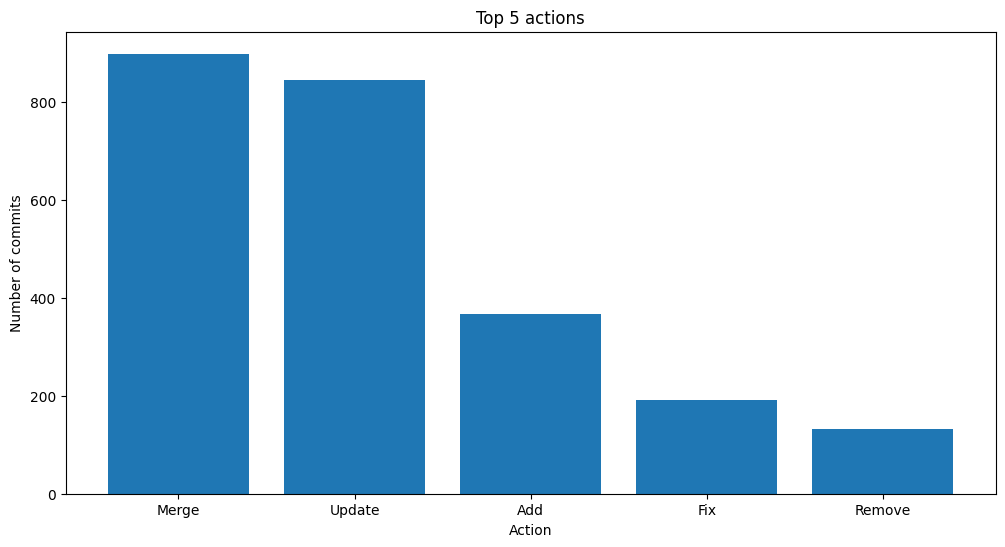

In [54]:
# Count the occurrences of each action in commits
action_counts = df['Action'].value_counts()

# Get the top 5 actions with the highest occurrences
top_actions = action_counts.head(5)

# Create a bar plot for the top 5 actions
plt.figure(figsize=(12, 6))
plt.bar(top_actions.index, top_actions.values)
plt.xlabel('Action')
plt.ylabel('Number of commits')
plt.title('Top 5 actions')
plt.show()

